In [1]:
import pybullet as p
import time
import pybullet_data

# Hello world

https://usermanual.wiki/Document/pybullet20quickstart20guide.479068914/view

In [3]:
physicsClient = p.connect(p.GUI) #or p.DIRECT for non-graphical version
p.setAdditionalSearchPath(pybullet_data.getDataPath()) #optionally
p.setGravity(0,0,-10)
planeId = p.loadURDF("plane.urdf")
cubeStartPos = [0,0,1]
cubeStartOrientation = p.getQuaternionFromEuler([0,0,0])
boxId = p.loadURDF("r2d2.urdf",cubeStartPos, cubeStartOrientation)

In [4]:
for i in range (1000):
    p.stepSimulation()
    time.sleep(1./240.)

In [5]:
cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)
print(cubePos,cubeOrn)

(-9.42154574035435e-06, 0.0035328412386201966, 0.47082230521944035) (-1.0515315064309405e-05, 1.9498984297701608e-06, -5.988761778892467e-05, 0.9999999981495497)


In [6]:
p.disconnect()

# gym pybullet

In [1]:
from pybullet_envs.bullet.kukaCamGymEnv import KukaCamGymEnv
import time

env = KukaCamGymEnv(renders=False, isDiscrete=False)

motorsIds = []
motorsIds.append(env._p.addUserDebugParameter("posX",0.4,0.75,0.537))
motorsIds.append(env._p.addUserDebugParameter("posY",-.22,.3,0.0))
motorsIds.append(env._p.addUserDebugParameter("posZ",0.1,1,0.2))
motorsIds.append(env._p.addUserDebugParameter("yaw",-3.14,3.14,0))
motorsIds.append(env._p.addUserDebugParameter("fingerAngle",0,0.3,.3))

# dv = 0.01
# motorsIds.append(env._p.addUserDebugParameter("posX", -dv, dv, 0))
# motorsIds.append(env._p.addUserDebugParameter("posY", -dv, dv, 0))
# motorsIds.append(env._p.addUserDebugParameter("posZ", -dv, dv, 0))
# motorsIds.append(env._p.addUserDebugParameter("yaw", -dv, dv, 0))
# motorsIds.append(env._p.addUserDebugParameter("fingerAngle", 0, 0.3, .3))


current_dir=/root/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pybullet_envs/bullet


In [3]:
%%time 

done = False
for i in range(1000):
    action = []
    for motorId in motorsIds:
        action.append(0)  # env._p.readUserDebugParameter(motorId))

    state, reward, done, info = env.step2(action)
    obs = env.getExtendedObservation()

CPU times: user 1min 43s, sys: 89.9 ms, total: 1min 43s
Wall time: 1min 44s


In [10]:
import matplotlib.pyplot as plt

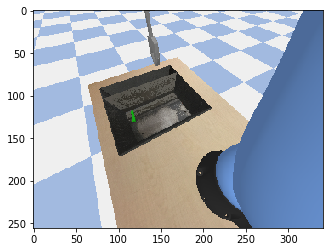

In [11]:
plt.imshow(obs)

In [5]:
env.close()